In [1]:
pip install pandas scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
# breast_cancer_priority_prediction.ipynb

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
df = pd.read_csv(url)

print(df.shape)  # Should be (569, 32)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Drop unused columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [6]:
# Encode diagnosis (B = 0, M = 1)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [7]:
# Create a synthetic 'priority' label based on a key metric (e.g., radius_mean)
df['priority'] = pd.qcut(df['radius_mean'], q=3, labels=['low', 'medium', 'high'])

In [8]:
# Drop the feature used to create the target (to avoid data leakage)
df.drop(['radius_mean'], axis=1, inplace=True)

In [9]:
# Define features (X) and target (y)
X = df.drop('priority', axis=1)
y = df['priority']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predict
y_pred = model.predict(X_test)

In [13]:
# Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [14]:
print("Accuracy:", acc)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029
F1 Score: 0.9766045346540703

Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.95      0.97        57
         low       0.98      1.00      0.99        59
      medium       0.95      0.98      0.96        55

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



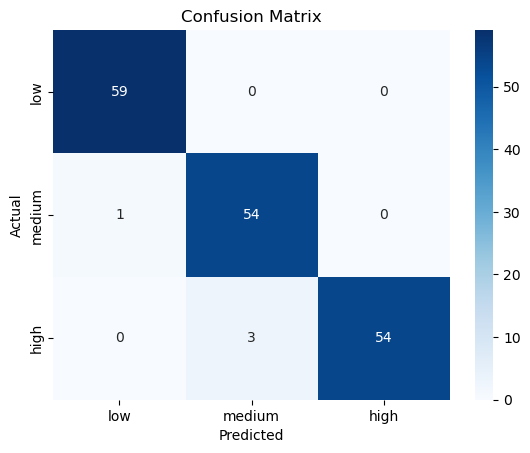

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'], cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()